# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
print(X.info(),'\n')
print('-NAN em X-')
print(X.isna().sum())
print('\n-Nulos em X- ')
print(X.isnull().sum())
print('\n-NAN em y-')
print( y.isna().sum())
print('\n-Nulos em y-')
print(y.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None 

-NAN em X-
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

-Nulos em X- 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM 

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [5]:
df = pd.concat([X, y], axis=1, join="inner")
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

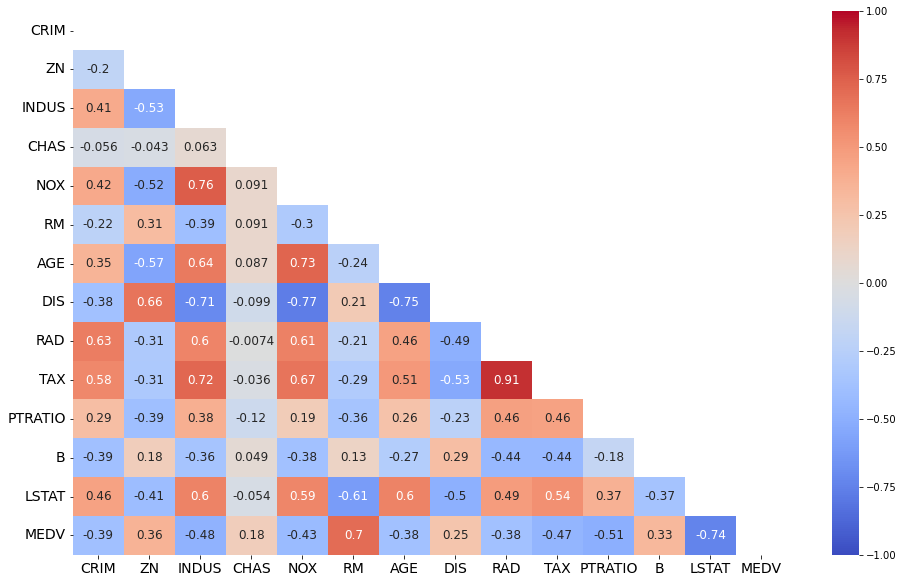

In [6]:
masc = np.zeros_like(df.corr())
tri_index = np.triu_indices_from(masc)
masc[tri_index] = True
masc
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(df.corr(),annot=True,annot_kws={'size':12},vmin=-1,vmax=1,cmap='coolwarm',mask=masc)

### CONCLUSÃO
Listamos abaixo as variáveis que mais nos chamaram a atenção:
- LSTAT=-0.74
- RM=0.7
- PTRATIO=-0.51
- INDUS=-0.48
- TAX=-0.48

### OUTRAS OBSERVAÇÕES

- NOX x INDUS = 0.76 indica que quanto mais industrializada for a região, maior será a concentração de óxido nítrico, poluentes oriundo de processos de queima de combustíveis fósseis utilizados em caldeiras, por exemplo;

- TAX x INDUS = 0.72 da mesma forma que a correlação anterior, os impostos sobre propriedade tendem a ser maiores em regiões industrializadas;

- NOX x DIS = -0.77 de correlação negativa confirma que quanto maior for a distância dos centros de atividades industriais, menor será a concentração de gases poluentes;

- RAD x TAX = 0.91 embora alta, esta correlação pode levar a erros graves de leitura devido ao fato de a variável RAD ser uma variável discreta ou categórica, devendo, portanto, ser desprezada.

### 3. Separe os dados em validação e teste

##### VARIÁVEIS
LSTAT=-0.74    
RM=0.7    
PTRATIO=-0.51    
INDUS=-0.48    
TAX=-0.48

In [6]:
print(X.columns)
X.head(5)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [9]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

#### MSE base de treinamento

In [11]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))
print('\nQuanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.')
print('Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.')

O R² da árvore com profundidade=2 é: 0,71
O R² da árvore com profundidade=8 é: 0,98

Quanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.
Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.


#### MSE base de teste

In [13]:
mset1 = regr_1.score(X_test, y_test)
mset2 = regr_2.score(X_test, y_test)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mset1).replace(".",","))
print(template.format(regr_2.get_depth(),mset2).replace(".",","))
print('\nQuanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.')
print('Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.')

O R² da árvore com profundidade=2 é: 0,61
O R² da árvore com profundidade=8 é: 0,76

Quanto mais próximo de 0 o R², MENOS o modelo explica o fenômeno.
Quanto mais próximo de 1 o R²,  MAIS o modelo explica o fenômeno.


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore de treino (X_train) com profundidade=8 apresentou-se como a mais adequada, já que foi a que atingiu o R² mais alto de 0,98.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [14]:
# Fit regression model
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

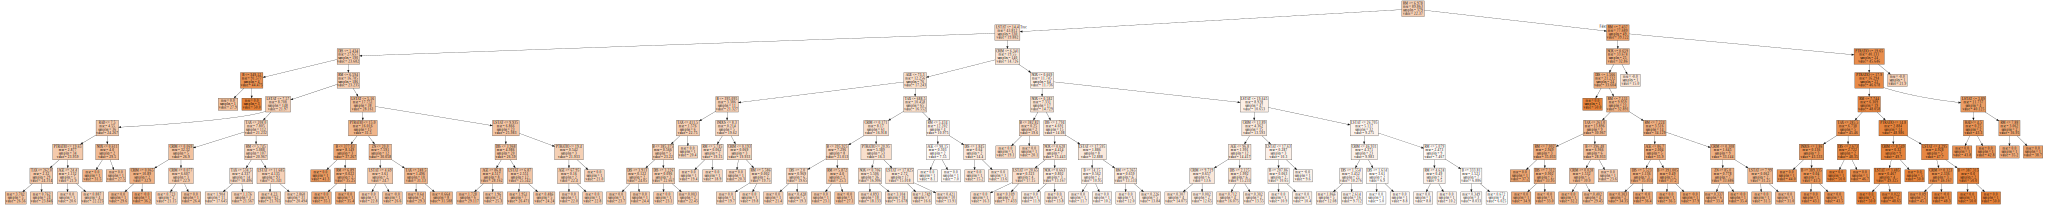

In [15]:
# DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

In [16]:
graph.render(filename='arvore')

'arvore.png'